# Image Blending

Author: Vivek Roy  

**Maximum possible score = 100 points**

### Assignment Overview

The overall goals of this programming assignment are to explore essential image processing methods and to blend two images using Gaussian and Laplacian pyramids. You should note any connection between the implementation of these methods and the theory presented in the lectures. 

### Learning Objectives 

* Edit a photo using image processing methods

### Source

This assignment was modeled, in part, on the approach covered in an Image Blending assignment offered in an Introduction to Visual Computing course by Dr. Fernando Flores-Mangas.

# Table of Contents 

#### [Part I: Image Basics [35 pts]](#part-1)
- [Item 1 [10 pts]: Image Loading](#q1)
- [Item 2 [0 pts]: Image Dimensions](#q2)
- [Item 3 [10 pts]: Image Cropping](#q3)
- [Item 4 [0 pts]: Image Viewing](#q4)
- [Item 5 [15 pts]: Creating Images](#q5)
- [Item 6 [0 pts]: Visualize the Mask](#q6)


#### [Part 2: Image Pyramids [65 pts]](#part-2)
- [Item 7 [20 pts]: Gaussian pyramid](#q7)
- [Item 8 [20 pts]: Laplacian pyramid](#q8)
- [Item 9 [15 pts]: Images from Laplacian Pyramid](#q9)
- [Item 10 [10 pts]: Images from Laplacian Pyramid](#q10)

#### [Part 3: Challenge (Optional) [0 pts]](#part-3)
- [Item 11 [0 pts]: Merging two very different images](#q11)

In [1]:
#import libraries for this assignment
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian
from skimage.transform import resize

<a name="part-1"></a>
# Part I: Image Basics [ 35 pts]

We start this assignment with loading an image file and visualizing the values that constitute it. In the course, you learnt about how an image is a matrix of values. We will validate that claim on some image files. We will also create an image from a matrix of values and save that to disk. In the process, you will learn about some common Python functions used for loading, cropping, visualizing, and writing images.

<a name="q1"></a>
## Image Loading [ 10 pts]

You are going to use the `scikit-image` library (also known as `skimage`) to load our image files into Python. Specifically, you will use the `imread` function from the `skimage.io` module. (API reference: [`imread`](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread))

In [2]:
from skimage.io import imread
import os

Use the `imread` function to load the following three images from the `img` subfolder:
1. `img/front.jpg`
2. `img/center.jpg`
3. `img/back.jpg`

In [3]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
front = imread('img/front.jpg')
center = imread('img/center.jpg')
back = imread('img/back.jpg')

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q2"></a>
## Image dimensions [ 0 pts]

Now that we have loaded 3 `JPG` files into variables, let us disect these objects. The `imread` function we used loads the image into a numpy [ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html) which is essentially a datastructure representing a multidimensional matrix. If you print the shape of the above three images using the `.shape` member of `ndarray` instances as `front.shape`, you will see a shape of `(2000, 3000, 3)`.

The value `2000` represents the height of the image, `3000` represents the width of the image while the `3` represents the number of channels &mdash; the Red, Green and Blue (RGB) channels of a colored image.

A numpy `ndarray` can be indexed in a lot of ways (See [Numpy User Guide](https://numpy.org/doc/stable/user/basics.indexing.html) for details). We will index into them to crop a small portion of an image.

In [4]:
front.shape

(2000, 3000, 3)

<a name="q3"></a>
## Image cropping [ 10 pts]

Use array indexing to crop into the `center` image with x (rows) from index 1300 to 1400 and y (columns) from index 800 to 900. Make sure to have all color channels. Store this into a variable named `crop`.

As a sanity check, you can test the shape of the cropped image with `crop.shape`.

In [5]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
crop = center[800:900,1300:1400, :]
crop.shape
# YOUR CODE HERE
# raise NotImplementedError()

(100, 100, 3)

<a name="q4"></a>
## Image viewing [0 pts]

`matplotlib` is a very popular Python library for plotting graphs and visualizing images, among other things related to them. We will be using the `imshow` function (API Reference: [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow)) from `matplotlib.pyplot` module to visualize images. 

In [6]:
import matplotlib.pyplot as plt

Use `plt.imshow(image)` to plot/show the image. Plot the crop image we generated in the previous step. You should see the tip of a pyramidal object with blue and red sides.

Note: If not in a notebook environment, you might have to use `plt.show()` function before you see anything.

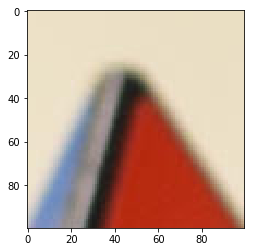

In [7]:
plt.imshow(crop)

You can now see any image inside of Python. Go ahead and see the three images (front, center and back) we loaded before. As you examine these images, be sure to look for which regions of each image are in sharp focus and which regions are blurry.  

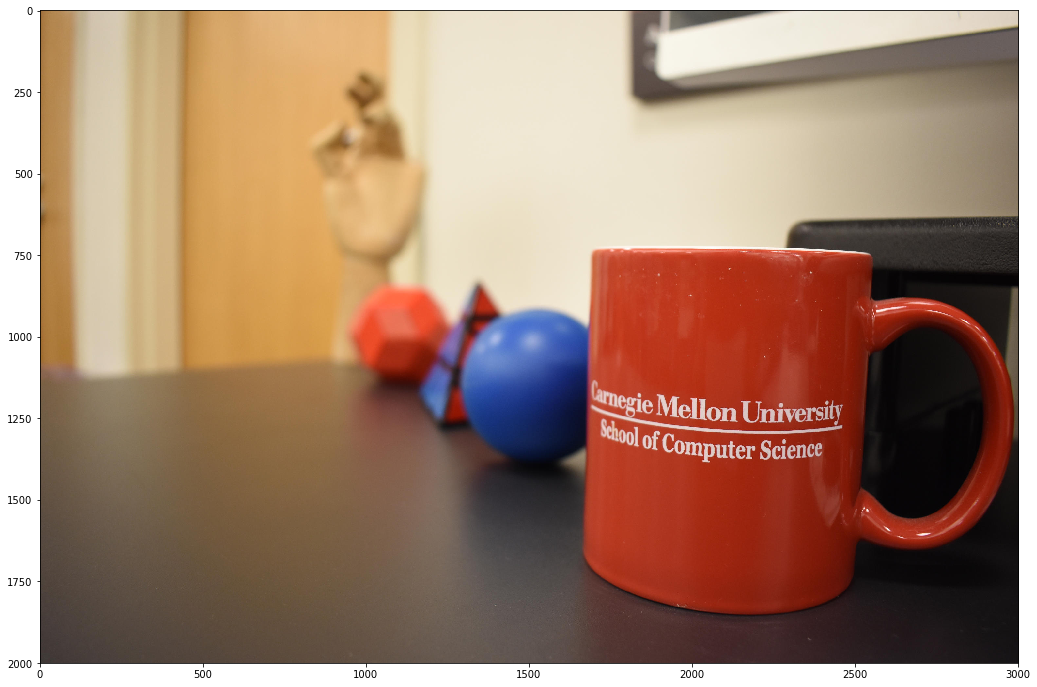

In [8]:
plt.figure(figsize=(18,12))
plt.imshow(front)

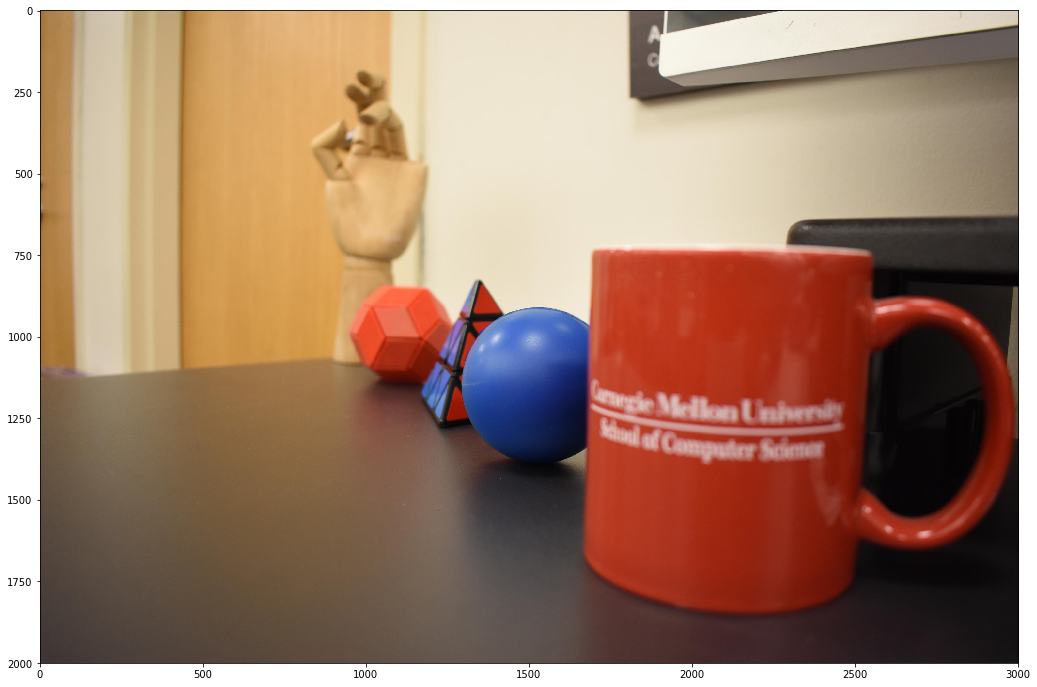

In [9]:
plt.figure(figsize=(18,12))
plt.imshow(center)

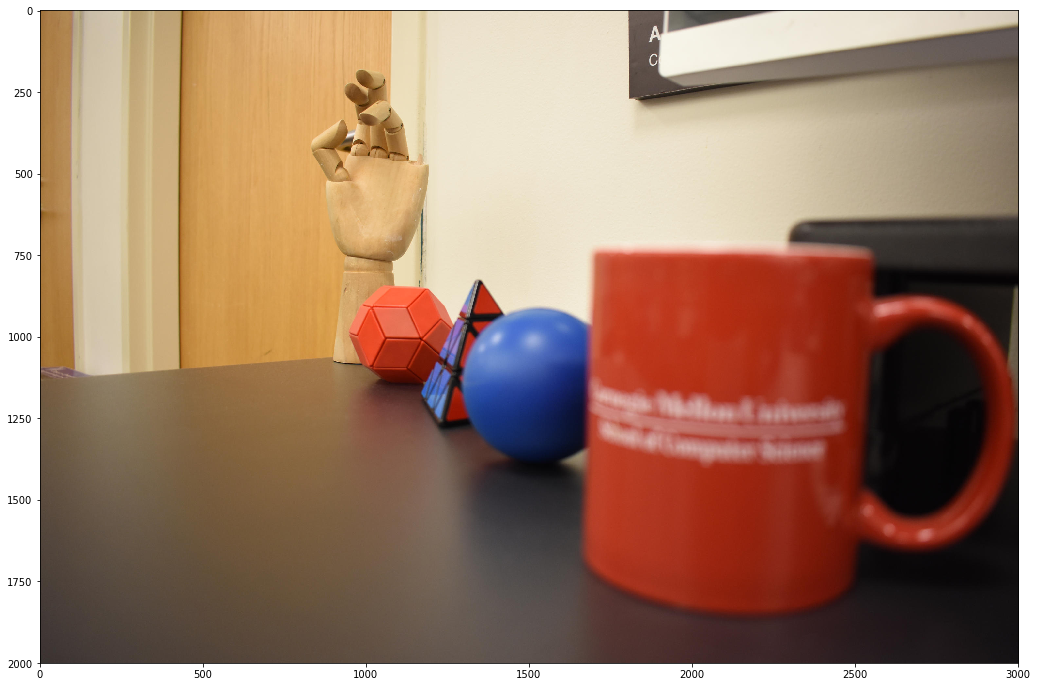

In [10]:
plt.figure(figsize=(18,12))
plt.imshow(back)

You can also show images side-by-side using the subplots call along with titles. Again, notice which regions are sharp and which are blurry. 

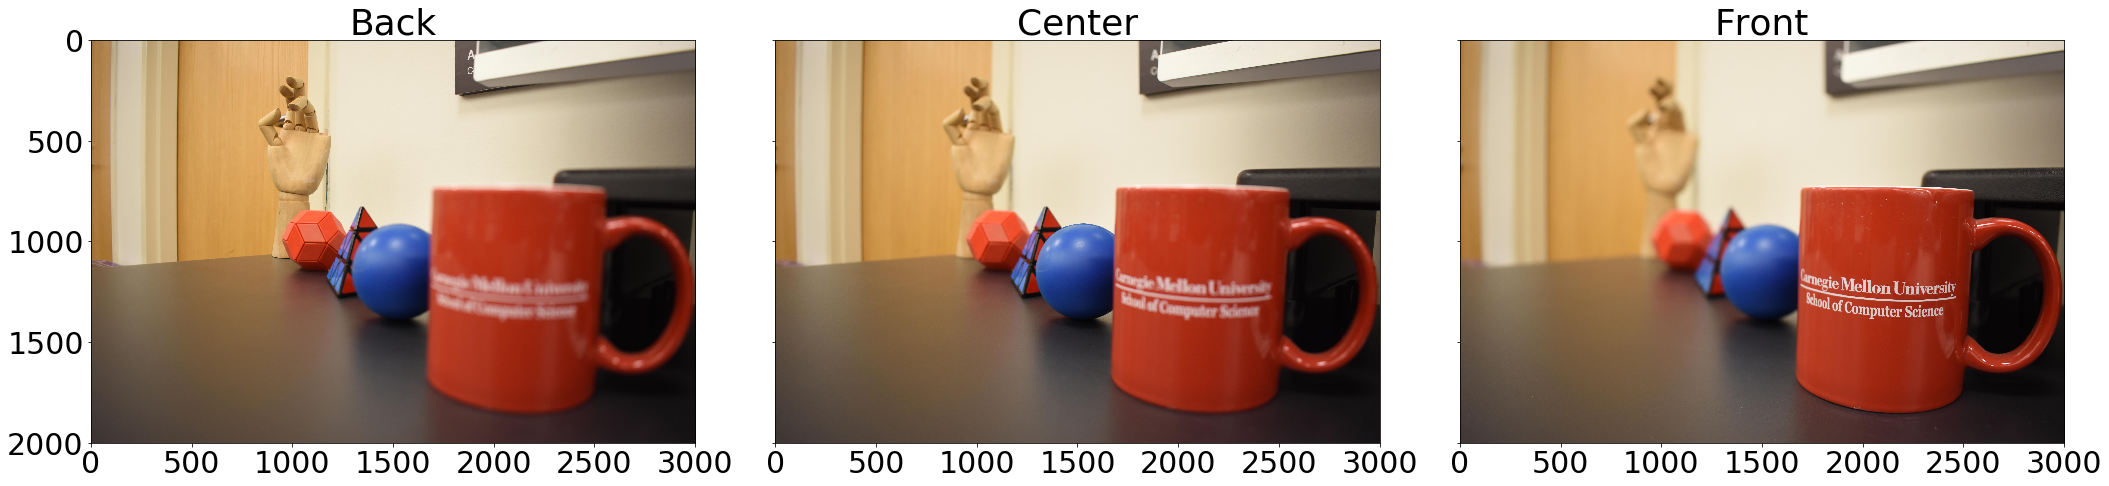

In [11]:
#set font size parameter
plt.rcParams.update({'font.size': 30})

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(30,12))
ax1.imshow(back)
ax1.title.set_text("Back")
ax2.imshow(center)
ax2.title.set_text("Center")
ax3.imshow(front)
ax3.title.set_text("Front")
plt.tight_layout()

Can you now tell why the files have been named the way they have been?

That is right, back.jpg has the camera focusing at the back objects, center.jpg is focused on the central objects while front.jpg is focused on the front mug.

<a name="q5"></a>
## Creating Images [15 pts]

We will now create an image from inside Python. It will be a very basic black and white image, probably only a few clicks in MS Paint, but this basic image will be useful for the rest of the assignment.

A **binary image** is an image made up of only 0s and 1s, where zero represents full black and 1 represents full color &mdash; a 0 in the red channel will mean no red and a 1 in the red channel will mean full red.

We will create a binary image which is black and white, i.e. red, blue and green values are equal for every pixel location and since it is a binary image that has to be either 0 or 1.

Create a binary image with the same shape as the other 3 images (all 3 images have the same shape) with the first 1339 columns as black (all channels have zeros) and the rest white (all channels have ones). Store it in a variable names mask.

See `numpy.zeros` or `numpy.ones` along with your previous knowledge on indexing numpy `ndarray`.

In [12]:
import numpy as np

In [13]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE

mask = np.zeros(center.shape)
mask[:, 1339] = 0
mask[:,1340:]=1

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q6"></a>
## Visualize the mask [0 pts]

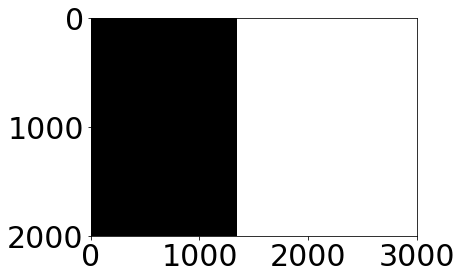

In [14]:
plt.imshow(mask)

<a name="part-2"></a>
# Part 2: Image Blending [65 pts]

<a name="q7"></a>
## Gaussian pyramid [20 pts]

We will first write a function for computing the Gaussian pyramid of an image. We will use the `gaussian` function (API Reference: [`gaussian`](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian)) from `skimage.filters` for applying a Gaussian blur to an image.

Note: Instead of taking a kernel or the size of a kernel, this function takes a value of sigma and a truncated value and computes a kernel internally. A sigma of 1.0 and truncated value of 3.5 will give a 7$\times$7 Gaussian kernel.

In [15]:
from skimage.filters import gaussian

Complete the following function to compute the Gaussian pyramid of an image. Here is an explanation for the arguments to the function &mdash;

1. `image`: The image whose gaussian pyramid we want to make
2. `sigma`: The sigma to pass to the `gaussian` function from skimage to blur the image
3. `truncate`: The truncate value to pass to the `gaussian` function from skimage
4. `smallestDimension`: Both the height and width of the smallest image of the gaussian pyramid should be smaller than this value.

The function should return a list of images with the first image being the largest image and the last image being the smallest of the Gaussian pyramid.

In [16]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
# def gaussianPyramid(image, sigma=10, truncate=4, smallestDimension=100):
def gaussianPyramid(image, sigma=1.0, truncate=3.5, smallestDimension=100):
  pyramid = []
  if image.dtype == int:
    image = image.astype(float) / 255
  pyramid = [image]
  while image.shape[0] > smallestDimension or image.shape[1] > smallestDimension:
    image = gaussian(image, sigma=sigma, truncate=truncate, multichannel=True)[::2, ::2]
    pyramid.append(image)
  return pyramid

# YOUR CODE HERE
# raise NotImplementedError()

<a name="q8"></a>
## Laplacian Pyramid [20 pts]

Now we will write a function to generate the Laplacian pyramid of an image. We will continue to use the `gaussian` function from `skimage` as we did with the gaussian pyramid. The only difference here will be that instead of just returning the pyramid this time we will return a tuple of `(smallestImage, pyramid)` where `smallestImage` is the smallest image of the Laplacian pyramid and `pyramid` is a pyramid of residuals at different resolutions starting from the largest to the smallest.

Complete the following function to compute the Laplacian pyramid of an image.

In [17]:
### GRADED
### YOUR ANSWER BELOW
def laplacian(image, sigma, truncate):
    filtered = gaussian(image, sigma=sigma, truncate=truncate, multichannel=True)
    return filtered[::2,::2,:], image - filtered
### YOUR SOLUTION HERE
def laplacianPyramid(image, sigma=10, truncate=4, smallestDimension=100):
    image = image.astype(float) / 255
    pyramid = []
    while image.shape[0] > smallestDimension or image.shape[1] > smallestDimension:
        image, residual = laplacian(image, sigma, truncate)
        pyramid.append(residual)
    return image, pyramid

# YOUR CODE HERE
# raise NotImplementedError()

In [18]:
from skimage.filters import gaussian
import numpy as np

def gaussianPyramid(image, sigma=1.0, truncate=3.5, smallestDimension=100):
    pyramid = []
    while min(image.shape[:2]) > smallestDimension:
        pyramid.append(image)
        image = gaussian(image, sigma=sigma, truncate=truncate, multichannel=True)
        image = image[::2, ::2, :]  # Downsample the image by a factor of 2 in both dimensions
    pyramid.append(image)  # Append the smallest image to the pyramid
    return pyramid


<a name="q9"></a>
## Images from Laplacian Pyramid  [15 pts]

Let us now see how we can get back the original image from the small image and the Laplacian pyramid we computed above.

Write a function that takes two arguments:
1. a small image 
2. a Laplacian pyramid which has the residuals in descending order of dimension (i.e. the residuals with the same dimensions as the small image is the last element of the list). 

From that function, return an image obtained from the pyramid with the same dimensions as the first element of the Laplacian pyramid.

In order to scale an image fron dimension $d$ to $D$ where $D > d$ use the `resize` function (API reference: [`resize`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.resize)). Use the default values for all the named arguments. 

In [19]:
from skimage.transform import resize

In [20]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
def pyramidToImage(small, pyramid):
    image = small
    for residual in reversed(pyramid):
        image = resize(image, residual.shape)
        image += residual
    return image

# YOUR CODE HERE
# raise NotImplementedError()

Let us see how we can use the gaussian and Laplacian pyramids to do image blending. Let us merge `back.jpg` image with `front.jpg` image to generate an image with both the front and back objects in focus but not the middle objects.

First, let us do it the naive way by having 50% transparency for both the images.

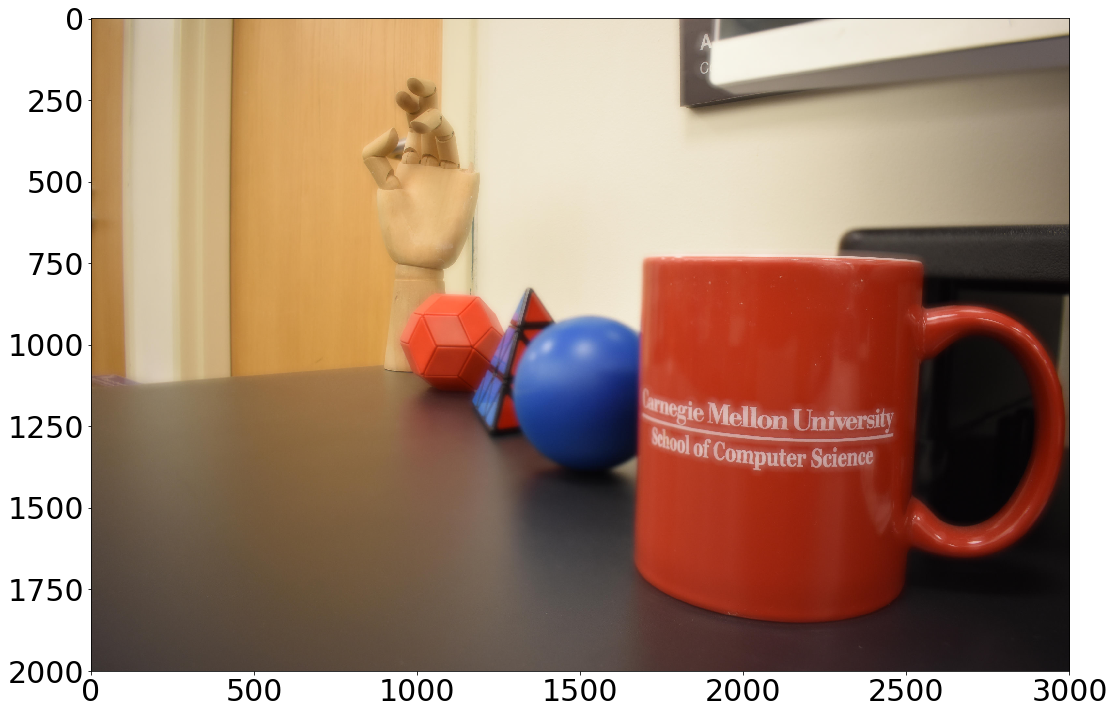

In [21]:
naiveMerged = (0.5 * front + 0.5 * back).astype(np.uint8)
plt.figure(figsize=(18,12))
plt.imshow(naiveMerged)

Do you see the whole image to have a kind of a blurriness you would typically see in a dreamy filter? While that might be an artistic effect you are looking for in some other scenario, that is not something we want when blending two images. Also, if the two images were very different, e.g. blending the image of an apple with an image of an orange, the resulting image would not have blurriness but ghosting.

Can we do better with a Laplacian pyramid?

Let's start with generating a Gaussian pyramid of the `mask`.

In [22]:
maskPyramid = gaussianPyramid(mask, sigma=30)

And then the Laplacian pyramid of both the front and back images

In [23]:
frontSmall, frontPyramid = laplacianPyramid(front)
backSmall, backPyramid = laplacianPyramid(back)

<a name="q10"></a>
## Laplacian Merging [10 pts]

Now let's merge the `front` and `back` laplacian pyramids while masking with the appropriate mask at each level.

Complete the code below. This should be very similar to recreating an image from it's laplacian pyramid except that at each stage we will also mask and combine with the other pyramid similar to what we did for the naive merging. Store it in a variable named `smartMerge`.

One easy way of doing this would be to merge the two laplacian pyramids together using the gaussian pyramid to form a new laplacian pyramid and then use the `pyramidToImage` function defined above to get the final image.

In [24]:
### GRADED
### YOUR ANSWER BELOW

### YOUR SOLUTION HERE
maskPyramid = gaussianPyramid(mask, sigma=30)
frontSmall, frontPyramid = laplacianPyramid(front)
backSmall, backPyramid = laplacianPyramid(back)
maskSmall = maskPyramid[-1]
mergedSmall = maskSmall * frontSmall + (1 - maskSmall) * backSmall
mergedPyramid = [maskP * frontP + (1 - maskP) * backP for frontP, backP, maskP in zip(frontPyramid, backPyramid, maskPyramid)]
smartMerge = pyramidToImage(mergedSmall, mergedPyramid)

# YOUR CODE HERE
# raise NotImplementedError()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


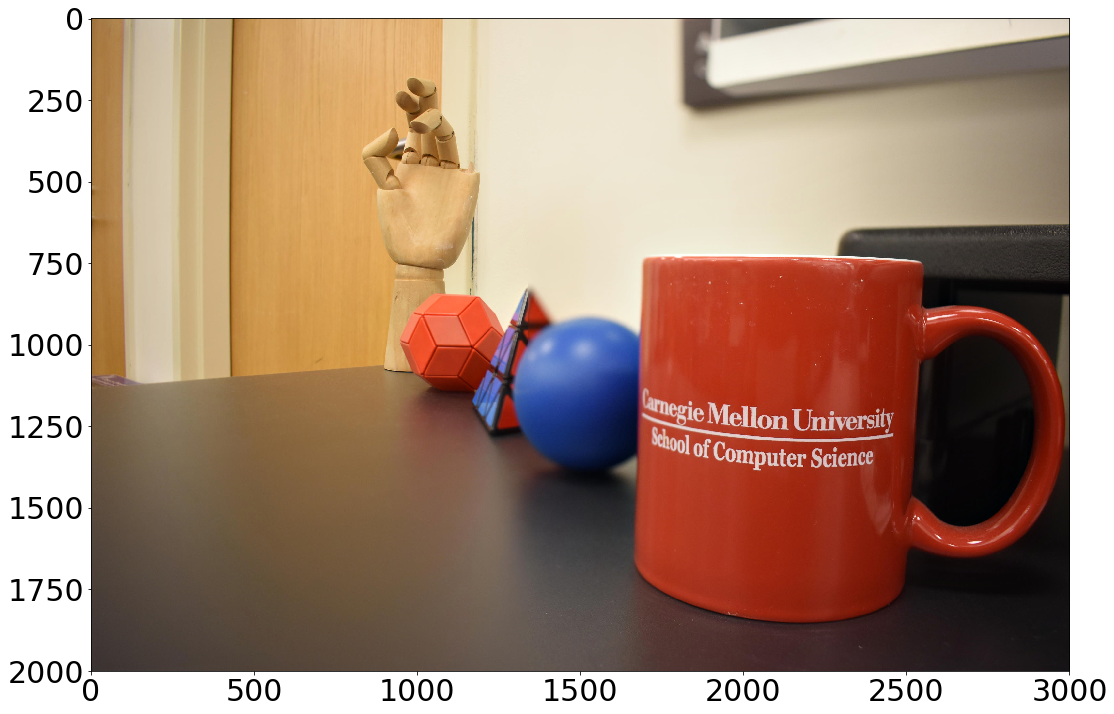

In [25]:
plt.figure(figsize=(18,12))
plt.imshow(smartMerge)

### Conclusion

Now that you've completed the assignment, think about each of the methods above and their impact on the resulting images. What was visually different between each of the blended images? How were those results generated and how did pyramids affect the results? Reflect on these guiding questions before considering the challenge below. 


<a name="part-3"></a>
# Part 3: Challenge Question (Optional) [0 pts]

<a name="q11"></a>
## Merging two very different images [0 pts]
​
A common example of image blending is blending the image of an apple with that of an orange. So here is a task for you &mdash;
​
1. Create separate photographs (*e.g.* `fruit_01.png`, `fruit_02.png`) of two pieces of fruit of similar size and dimensions. Try to make the images as similar as possible except the fruit in the foreground. That is, the only easily discernable difference in the photo will be the fruit itself. 
2. Align those two images so that the pieces of fruit are approximately the same shape, size and in about the same location in the image. You might have to crop, resize, or transform the image in other ways to get them to align properly.
3. Slice both the images vertically into a left half and a right half. Use your knowledge of image blending from above to blend  one half of one image with the other half of the other image using the Laplacian and Gaussian pyramids. You might have to play with the different $\sigma$ values before they look good. That is, blend the fruit_01 left half with the fruit_02 right half or *vice versa*. 
4. Submit your blended image in the discussion forum to show off your image blending skills to your peers and be sure to check out what they produced as well! 